In [10]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

train = pd.read_csv("../data/train.csv")
train.head(10)

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S
5,6,0,3,"Moran, Mr. James",male,NaN,0,0,330877,8.4583,NaN,Q
6,7,0,1,"McCarthy, Mr. Timothy J",male,54.0,0,0,17463,51.8625,E46,S
7,8,0,3,"Palsson, Master. Gosta Leonard",male,2.0,3,1,349909,21.0750,NaN,S
8,9,1,3,"Johnson, Mrs. Oscar W (Elisabeth Vilhelmina Berg)",female,27.0,0,2,347742,11.1333,NaN,S
9,10,1,2,"Nasser, Mrs. Nicholas (Adele Achem)",female,14.0,1,0,237736,30.0708,NaN,C


In [ ]:
test_data = pd.read_csv("../data/test.csv")
test_data.head()

## Some quick statistics on dataset

In [ ]:
survived = len(train_data.loc[train_data.Survived == 1])
total = len(train_data)

# Pie chart, where the slices will be ordered and plotted counter-clockwise:
labels = 'Survived', 'Died'
sizes = [survived, total-survived]

fig1, ax1 = plt.subplots()
ax1.pie(sizes, labels=labels, autopct='%1.1f%%')
ax1.axis('equal')  # Equal aspect ratio ensures that pie is drawn as a circle.
fig1.savefig("../img/survive_ratio.png")
plt.show()




In [ ]:
women = train_data.loc[train_data.Sex == 'female']["Survived"]
men = train_data.loc[train_data.Sex == 'male']["Survived"]

# creating the dataset
labels = ['Female', 'Men']
ratios = [sum(women)/len(women), sum(men)/len(men)]
ratios_fmt = ["{:.2%}".format(val) for val in ratios]
  
fig = plt.figure(figsize = (6, 4))
bars = plt.bar(labels, ratios, color ='lightblue', width = 0.4)
for i in range(len(size)):
    plt.text(i, ratios[i], ratios_fmt[i], ha = 'center')

# plt.xlabel("Ratio surviver by gender")
plt.ylabel("Percentage")
plt.title("Surviving Ratio by gender")
plt.savefig("../img/surviving_rate_by_gender.png", dpi=100)

1000
group
18-30    23.654971
30-50    40.189922
50-99    75.028021
Name: age, dtype: float64


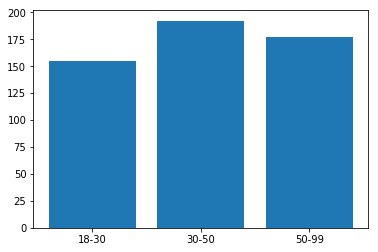

In [49]:
from data_visualization import *

N = 1000
df = pd.DataFrame({'age': np.random.randint(18, 99, N),
                   'revenue': 20 + 200*np.abs(np.random.randn(N))})


df['group'] = pd.cut(df['age'], bins = [18, 30, 50, 99], include_lowest = True, labels = ['18-30', '30-50', '50-99'])
print(len(df['age']))
df = df.groupby(by = 'group').mean()

print((df['age']))
fig, ax = plt.subplots()

ax.bar(x = df.index, height = df['revenue'])

plt.show()




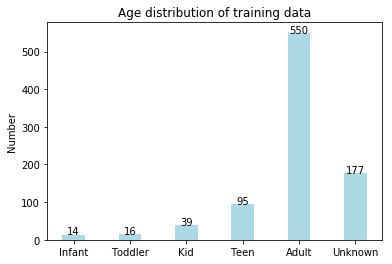

In [125]:
bins= [0,2,4,13,20,110]
labels = ['Infant','Toddler','Kid','Teen','Adult']

age_groups = pd.cut(train['Age'], bins=bins, labels=labels, right=False, retbins=True)

data = {l : 0 for l in labels}
data["Unknown"] = age_groups[0].size - age_groups[0].count()
for _, value in age_groups[0].dropna().items():
    data[value] += 1


# creating the dataset
labels = list(data.keys())
values = list(data.values())
  
fig = plt.figure(figsize = (6, 4))
bars = plt.bar(labels, values, color ='lightblue', width = 0.4)
for i in range(len(values)):
    plt.text(i, values[i], values[i], ha = 'center')

# plt.xlabel("Ratio surviver by gender")
plt.ylabel("Number")
plt.title("Age distribution of training data")
plt.savefig("../img/age_distribution.png", dpi=100)

{'Adult': 211, 'Infant': 12, 'Kid': 20, 'Teen': 39, 'Toddler': 8, 'Unknown': 52}
{'Adult': 339, 'Infant': 2, 'Kid': 19, 'Teen': 56, 'Toddler': 8, 'Unknown': 125}


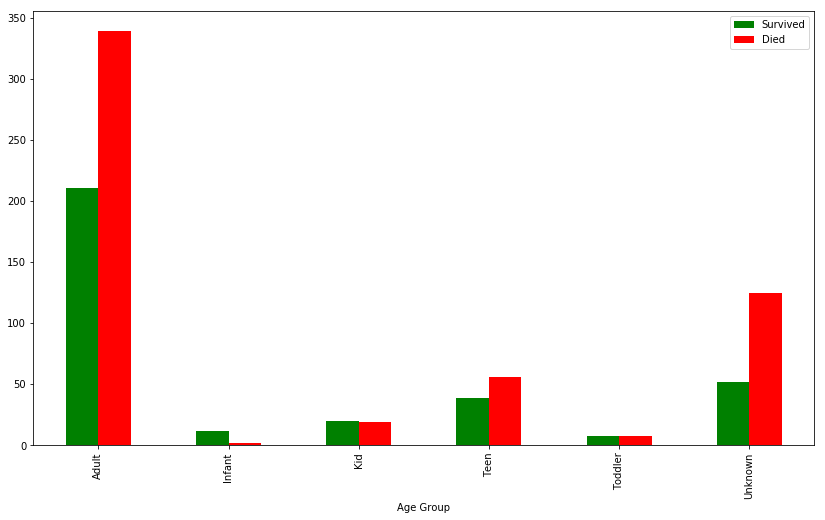

In [189]:
bins= [0,2,4,13,20,110]
labels = ['Infant','Toddler','Kid','Teen','Adult']

age_groups = pd.cut(train['Age'], bins=bins, labels=labels, right=False, retbins=True)[0]
train['AgeGroup'] = age_groups
train['AgeGroup'].replace(np.nan, 'Unknown', inplace=True)

groupByAge = train.groupby('AgeGroup')
survival = groupByAge['Survived'].value_counts()
survivedData = {}
diedData = {}
for l, v in survival.items():
    if l[1] == 0:
        diedData[l[0]] = v
    else:
        survivedData[l[0]] = v

print(survivedData)
print(diedData)

df = pd.DataFrame({
    'Age Group' : list(survivedData.keys()),
    'Survived' : list(survivedData.values()),
    'Died' : list(diedData.values())
})
fig = df.plot(x="Age Group", y=["Survived", "Died"], color=["g","r"], kind="bar", figsize=(14, 8)).get_figure()
fig.savefig("../img/survive_vs_dead_by_age_greoup.png")

# ages = train['AgeGroup'].value_counts()
# ages['Adult']

In [207]:
fil = train.isna()
train.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 13 columns):
PassengerId    891 non-null int64
Survived       891 non-null int64
Pclass         891 non-null int64
Name           891 non-null object
Sex            891 non-null object
Age            714 non-null float64
SibSp          891 non-null int64
Parch          891 non-null int64
Ticket         891 non-null object
Fare           891 non-null float64
Cabin          204 non-null object
Embarked       889 non-null object
AgeGroup       891 non-null object
dtypes: float64(2), int64(5), object(6)
memory usage: 90.6+ KB


In [1]:
PclassGroup = train.groupby('Pclass')


# df = pd.DataFrame(PclassGroup['Survived'].value_counts())
# df.columns = df.columns.get_level_values(0)
# df.reset_index(level='Pclass')

# df.columns = ["Num"]
# newDf = df.reset_index()

# filt = newDf['Survived'] == 1
# filt2 = newDf['Survived'] == 0

# survived = newDf.loc[filt]
# died = newDf.loc[newDf['Survived'] == 0]
# died['Num']




# # out = pd.DataFrame()
# # out['class'] = ["1st", "2nd", "3rd"]
# # out['Survived'] = survived['Num']
# # out['Died'] = died['Num']

# # out

# ax = plt.subplot()
# ax.bar(["1st", "2nd", "3rd"], survived['Num'])
# ax.bar(["1st", "2nd", "3rd"], died['Num'], color="maroon")


NameError: name 'train' is not defined